In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('wine.csv')

In [29]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
df.shape

(178, 14)

In [31]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [32]:
df.duplicated().sum()

0

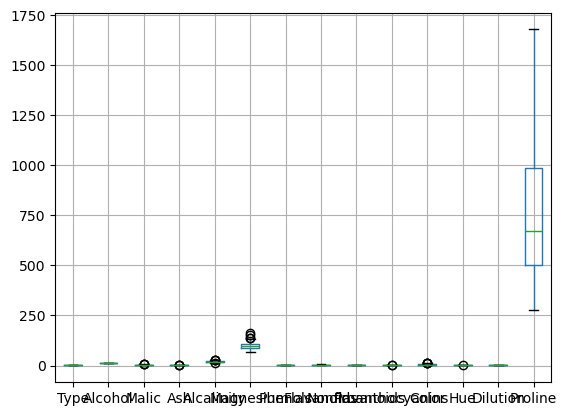

In [33]:
df.boxplot()
plt.show()

In [34]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-(1.5*IQR)
    upper_extreme=Q3+(1.5*IQR)
    df[column]=df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x > upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

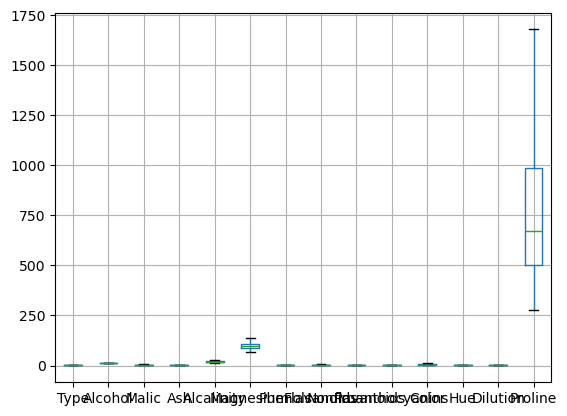

In [35]:
df.boxplot()
plt.show()

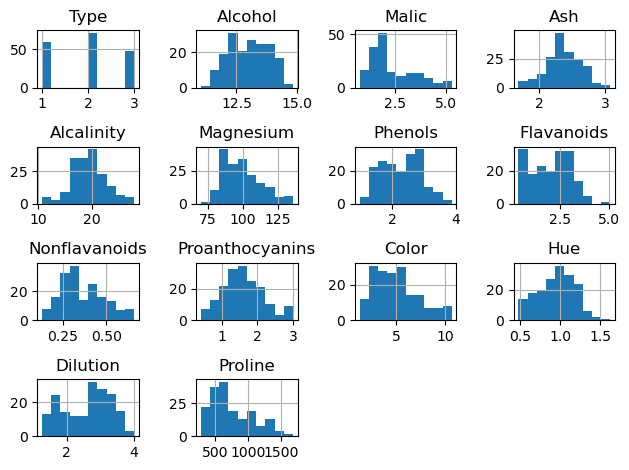

In [36]:
df.hist()
plt.tight_layout()
plt.show()

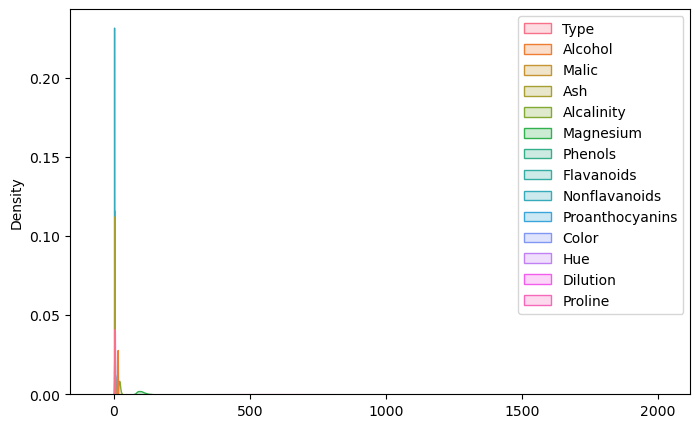

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df,fill=True,color='black')
plt.show()

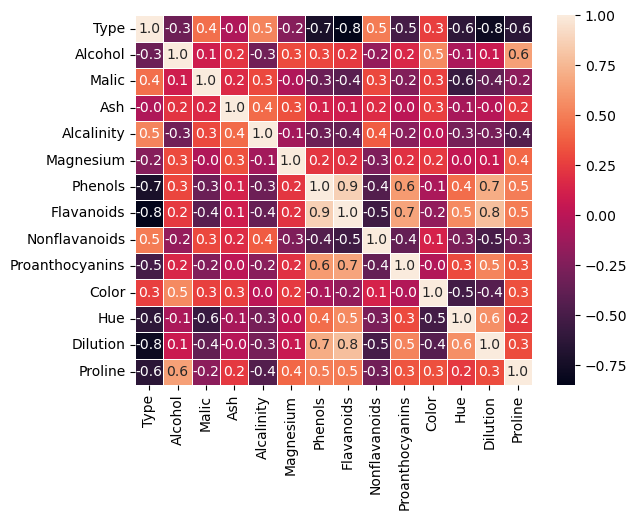

In [38]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=0.5,fmt='.1f')
plt.show()

In [39]:
target=df[['Type']]
features=df.drop(columns='Type')

In [40]:
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [41]:
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
sca = StandardScaler()
feature = pd.DataFrame(sca.fit_transform(features),columns=features.columns)

In [43]:
feature.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [44]:
pca= PCA()
feat=pd.DataFrame(pca.fit_transform(feature),columns=feature.columns)

In [45]:
feat.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566,-0.577236,-0.165368,-0.050547


In [46]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [47]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
plt.legend(loc="best")
plt.show()

In [49]:
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90)+1
n_components_90

8

In [50]:
pc= PCA(n_components=8)
pc_data=pc.fit_transform(feature)
feeat=pd.DataFrame(pc.fit_transform(feature),columns=[f'PC{i+1}' for i in range(pc_data.shape[1])])

In [51]:
feeat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559


Original Data

In [52]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)

In [53]:
kmeans.fit(feature)

KMeans(n_init=10, random_state=42)

In [54]:
cluster_labels = kmeans.labels_

In [55]:
silhouette_score(feature, cluster_labels)


0.1530174511008407

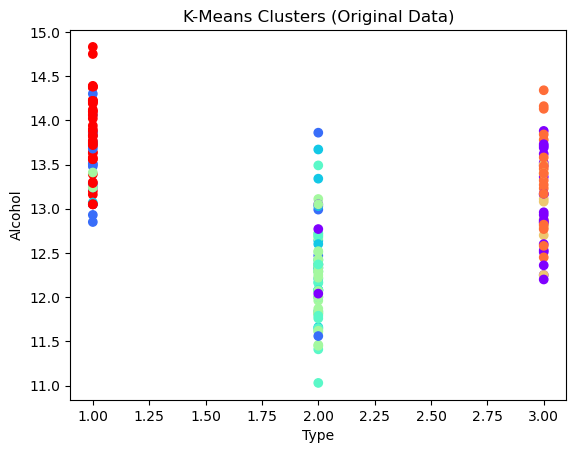

In [57]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_labels, cmap='rainbow')
plt.title("K-Means Clusters (Original Data)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

PCA Data

In [58]:
kmeansPCA = KMeans(n_clusters=8, random_state=42, n_init=10)

In [59]:
kmeansPCA.fit(feeat)

KMeans(n_init=10, random_state=42)

In [60]:
cluster_label = kmeansPCA.labels_

In [61]:
silhouette_score(feeat, cluster_label)

0.17346395629141642

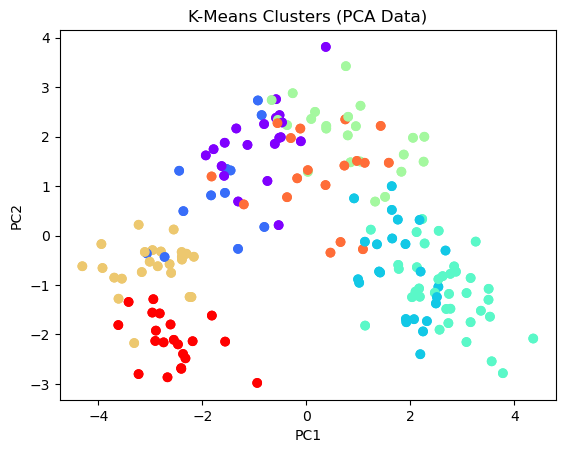

In [65]:
plt.scatter(feeat['PC1'], feeat['PC2'], c=cluster_label, cmap='rainbow')
plt.title("K-Means Clusters (PCA Data)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

The Silhouette Score for the PCA-based clustering (0.173) was marginally higher than that for the original data (0.153). More importantly, the visual representation showed a significant difference: the original data produced elongated, highly overlapping clusters that K-Means struggled to separate. Conversely, the PCA data resulted in more spherical, distinct, and spatially separated clusters, which aligns better with the K-Means algorithm's assumptions, leading to a more robust partitioning of the data.

2.	Discuss any similarities or differences observed in the clustering results.

The most notable difference is the substantial improvement in cluster structure and quality after PCA, evidenced by a higher Silhouette Score (0.173 vs. 0.153) and visually more spherical, better-separated clusters; the original data's clusters were elongated and highly overlapping. The key similarity lies in the overall goal of both attempts: to group the data points into the same number of k clusters, although the actual point assignments were optimized by the PCA transformation.

3.	Reflect on the impact of dimensionality reduction on clustering performance.

Dimensionality reduction via PCA generally has a positive impact on clustering performance by filtering out noise and making the data structure more amenable to algorithms like K-Means.It results in cleaner, more spherical clusters and improved metric scores, though the trade-off is reduced interpretability of the new dimensions.

4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

The core trade-off between using PCA before clustering and clustering directly on the original dataset is the balance between performance and interpretability. Using PCA generally yields superior clustering performance—higher metric scores and cleaner separation—by reducing noise and optimizing the data's structure for the algorithm, but this comes at the cost of low interpretability because the resulting clusters are defined by abstract components. Conversely, clustering the original data offers high interpretability with clusters defined by concrete features, yet it often suffers from poor performance due to redundancy and the high-dimensional nature of the raw data.

## Insights

1.	Summarize the key findings and insights from the assignment.

PCA effectively reduced dataset dimensionality.
K-Means performed comparably or slightly better on PCA data.
Visualization became much clearer.

2.	Discuss the practical implications of using PCA and clustering in data analysis.

 Computation time is high.
 need to visualize data effectively.

3.	Provide recommendations for when to use each technique based on the analysis conducted.

 Use PCA as a preprocessing step to simplify high-dimensional data.
 Combine PCA with other methods (like K-Means) for better generalization.